# Bollywood, Tollywood, and Indian Movies Analysis
## Objective: Compare average BoxOffice collection by genre in Combined vs Bollywood-only data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load and Prepare the Datasets

In [2]:
# Load datasets
bollywood = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_bollywood_movies.csv')
indian = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_indian_movies_simple_detailed.csv')
tollywood = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_tollywood_movies.csv')

In [3]:
# Standard column list
columns = ['MovieID','Title','Director','Genre','ReleaseYear','Budget (Crores)',
           'BoxOffice (Crores)','Rating','Duration (minutes)','LeadActor',
           'LeadActress','Language','ProductionCompany']

In [4]:
# Rename Bollywood columns
bollywood = bollywood.rename(columns={
    'movieid': 'MovieID',
    'title': 'Title',
    'director': 'Director',
    'genre': 'Genre',
    'releaseyear': 'ReleaseYear',
    'budget_crores': 'Budget (Crores)',
    'boxoffice_crores': 'BoxOffice (Crores)',
    'rating': 'Rating',
    'duration_minutes': 'Duration (minutes)',
    'leadactor': 'LeadActor',
    'leadactress': 'LeadActress',
    'language': 'Language',
    'productioncompany': 'ProductionCompany'
})[columns]

In [5]:
# Keep only relevant columns
indian = indian[columns]
tollywood = tollywood[columns]

### Combine and Deduplicate the Data

In [6]:
# Combine all datasets
combined = pd.concat([bollywood, indian, tollywood], ignore_index=True)

# Standardize titles to avoid duplicate entries with minor differences
combined['Title'] = combined['Title'].str.lower().str.strip()

# Drop duplicate titles
combined_unique = combined.sort_values(by='ReleaseYear', ascending=False).drop_duplicates(subset='Title', keep='first')

### Plot Average BoxOffice Collection by Genre

In [7]:
# Calculate average BoxOffice by genre
avg_boxoffice_genre_combined = combined_unique.groupby('Genre')['BoxOffice (Crores)'].mean().sort_values(ascending=False)
avg_boxoffice_genre_bollywood = bollywood.groupby('Genre')['BoxOffice (Crores)'].mean().sort_values(ascending=False)

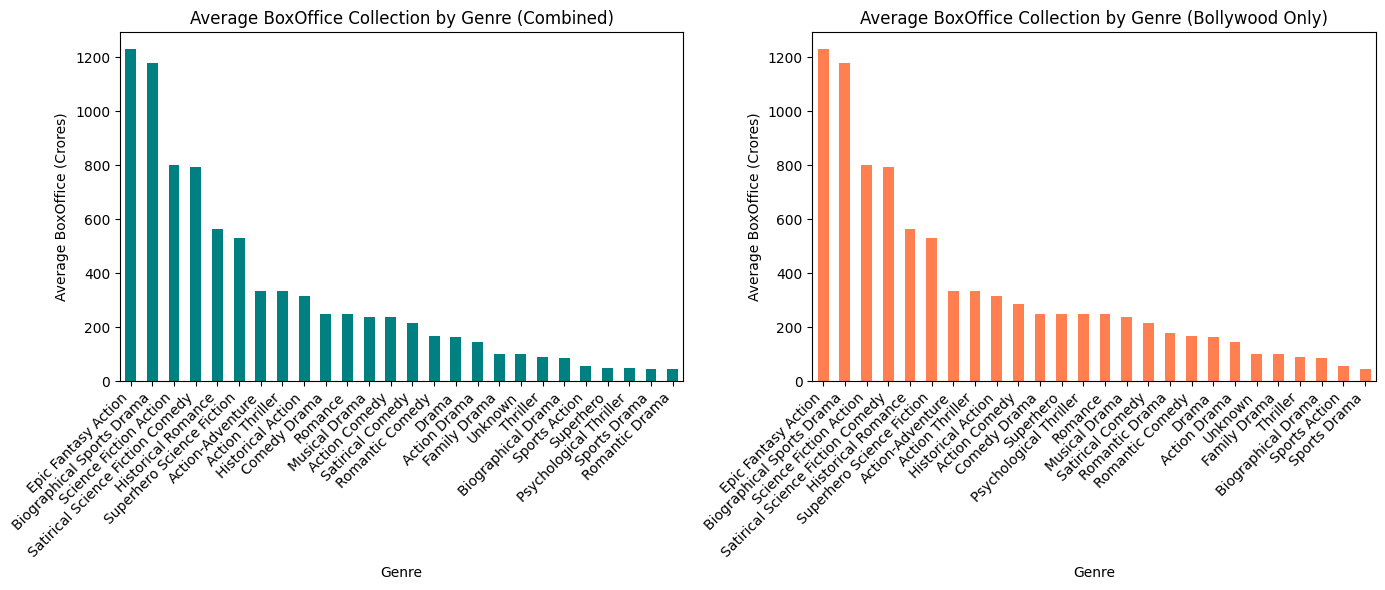

In [8]:
# Plot
plt.figure(figsize=(14, 6))

# Combined
plt.subplot(1, 2, 1)
avg_boxoffice_genre_combined.plot(kind='bar', color='teal')
plt.title('Average BoxOffice Collection by Genre (Combined)')
plt.ylabel('Average BoxOffice (Crores)')
plt.xticks(rotation=45, ha='right')

# Bollywood-only
plt.subplot(1, 2, 2)
avg_boxoffice_genre_bollywood.plot(kind='bar', color='coral')
plt.title('Average BoxOffice Collection by Genre (Bollywood Only)')
plt.ylabel('Average BoxOffice (Crores)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()